# Project 1: Integration of Mergesort & Insertion Sort

## Hybrid Algorithm

In [48]:
import matplotlib.pyplot as plt
import time
import random
import pandas as pd
import numpy as np
import os

In [3]:
# Global variable to track key comparisons
comparisons = 0


def insertion_sort(arr, left, right):
    """Insertion Sort on subarray arr[left:right+1]."""
    global comparisons
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left:
            comparisons += 1  
            if arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key


def merge(arr, left, mid, right):
    """Merge two sorted halves of arr[left:right+1]."""
    global comparisons
    n1 = mid - left + 1
    n2 = right - mid

    L = arr[left:mid + 1]
    R = arr[mid + 1:right + 1]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        comparisons += 1  
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1


def hybrid_merge_sort(arr, left, right, S):
    """Hybrid MergeSort: switches to Insertion Sort if subarray size <= S."""
    if left < right:
        if right - left + 1 <= S:
            insertion_sort(arr, left, right)
        else:
            mid = (left + right) // 2
            hybrid_merge_sort(arr, left, mid, S)
            hybrid_merge_sort(arr, mid + 1, right, S)
            merge(arr, left, mid, right)

In [4]:
def mergesort(arr, left, right):
    global comparisons
    if left < right:
        mid = (left + right) // 2
        mergesort(arr, left, mid)
        mergesort(arr, mid + 1, right)
        merge(arr, left, mid, right)


## Dataset

In [15]:
n = 1000000
arr = [random.randint(1, n) for _ in range(n)]
print(arr[:1000])
# statistics of arr to ensure randomness
print(f"Max: {max(arr)}, Min: {min(arr)}, Mean: {np.mean(arr)}, Median: {np.median(arr)}, Std: {np.std(arr)}")

[767246, 387141, 262918, 361854, 194175, 112636, 475564, 388305, 57433, 710967, 135486, 503702, 400998, 926932, 511850, 997371, 849827, 461812, 280602, 27726, 218879, 295146, 246407, 518939, 56483, 73270, 67761, 453233, 937874, 713299, 732974, 331988, 711687, 207035, 45750, 645267, 320224, 826972, 88589, 121605, 80375, 680849, 248123, 787658, 207509, 655778, 8797, 360156, 217474, 390340, 12221, 643460, 29190, 136067, 927163, 440953, 960230, 292747, 714816, 136698, 930823, 126667, 963028, 424690, 404831, 386605, 804037, 614751, 350153, 592225, 259087, 828254, 818889, 868472, 229665, 515239, 555470, 818120, 508329, 189712, 674590, 237004, 957734, 169642, 783461, 865288, 524467, 144308, 838193, 741550, 508812, 10007, 788043, 930659, 4999, 15261, 86308, 994344, 692582, 920609, 478803, 691407, 561196, 438545, 380094, 160064, 185055, 378992, 847703, 894464, 35897, 276413, 737921, 154082, 992845, 807331, 562293, 789236, 238924, 480824, 981516, 347394, 74697, 870422, 76676, 90826, 158517, 5443

## Example

In [2]:
if __name__ == "__main__":
    n = 1000
    S = 10 
    arr = [random.randint(1, n) for _ in range(n)]

    print("Original array:", arr)
    comparisons = 0
    hybrid_merge_sort(arr, 0, n - 1, S)
    print("Sorted array:  ", arr)
    print("Key comparisons:", comparisons)


Original array: [406, 47, 434, 407, 746, 873, 807, 808, 839, 190, 370, 240, 937, 863, 150, 132, 247, 848, 361, 108, 894, 281, 88, 406, 167, 427, 436, 270, 270, 857, 63, 652, 261, 76, 231, 837, 728, 758, 890, 213, 311, 432, 904, 2, 146, 812, 781, 60, 571, 214, 744, 487, 882, 250, 264, 39, 446, 908, 986, 899, 176, 131, 738, 457, 855, 996, 690, 560, 488, 460, 295, 451, 203, 634, 51, 252, 533, 213, 525, 323, 472, 235, 869, 95, 235, 270, 533, 115, 945, 669, 471, 101, 276, 234, 102, 66, 548, 456, 927, 493, 875, 930, 777, 317, 146, 896, 274, 716, 349, 490, 602, 929, 57, 331, 511, 259, 439, 441, 185, 532, 767, 821, 575, 665, 354, 8, 541, 441, 336, 264, 415, 579, 984, 213, 774, 605, 781, 8, 558, 57, 106, 625, 865, 108, 946, 378, 946, 138, 488, 454, 189, 642, 56, 366, 525, 55, 141, 402, 163, 409, 176, 881, 161, 555, 176, 146, 500, 280, 966, 120, 126, 668, 132, 12, 810, 851, 473, 287, 10, 817, 289, 225, 251, 151, 888, 934, 850, 915, 55, 931, 962, 498, 631, 209, 877, 764, 650, 750, 488, 592, 797, 

## Analyze time complexity

For n < S, it will perform like Standard insertion sort

For n > S, the recursion is like standard Mergesort, but it stops early at subarrays of size ≤ S. 

In the hybrid, for a subarray of size k, where k <= S:

Best case (already sorted): O(k) comparisons

Worst case (descending order): O(k^2) comparisons

So Insertion Sort part contributes at most O(S^2) per small subarray.

Insertion sort cost = n/S * O(S^2) = O(nS)

Standard Mergesort = O(nlogn)

At each level, total merge cost average is O(n) comparisons. 

number of level before array size <= S is around log(n/S)

Merge cost over all levels=O(n log(n/S))



Hence,
Total cost = O(n log(n/S) + nS)

Best case = O(n log(n/S) + S)

Worst case = O(n log(n/S) + nS)

In [ ]:
def theoretical_hybrid(n, S):
    # n log(n/S) + nS
    if n < S:
        return n * np.log(n / S) + n * S
    else:
        return n ** 2

### value of S fixed, comparisons over different sizes of the input list n

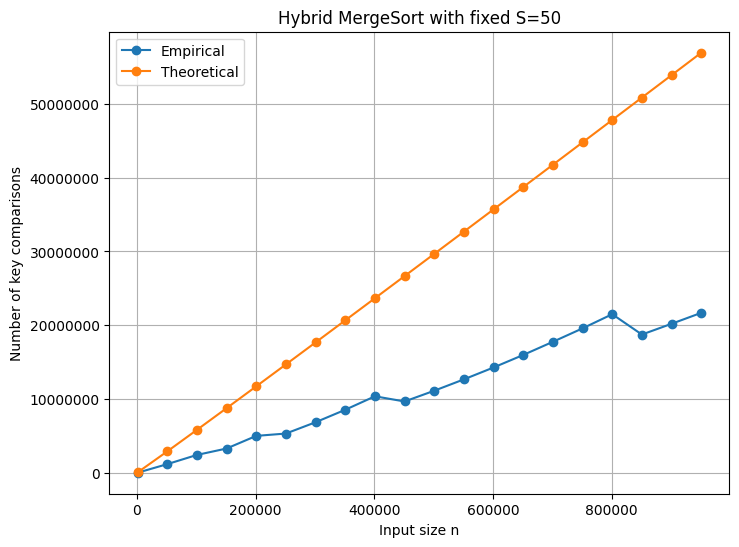

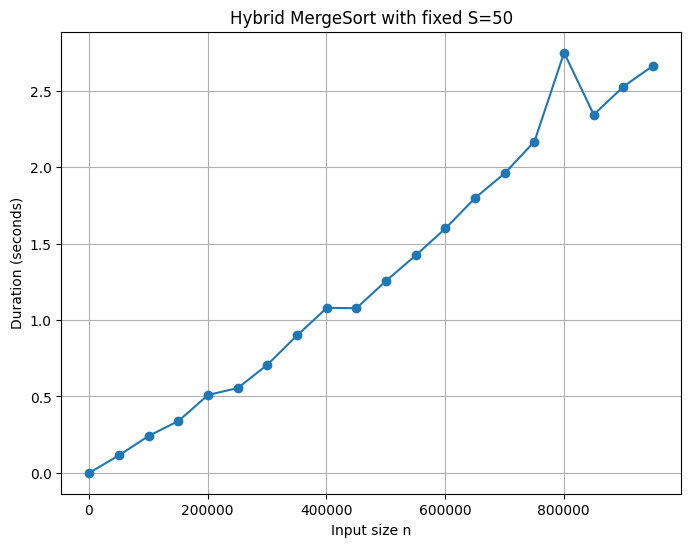

In [23]:
S = 50
sizes = [x for x in range(1000, 1000001, 50000)]
results = []
durations = []

for n in sizes:
    arr = [random.randint(1, n) for _ in range(n)]
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr, 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

theoretical = [theoretical_hybrid(n, S) for n in sizes]
# Plot
plt.figure(figsize=(8,6))
plt.plot(sizes, results, marker="o", label="Empirical")
plt.plot(sizes, theoretical, marker='o', label="Theoretical")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(sizes, durations, marker="o")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### input size n fixed, comparisons over different values of S

For size is n, after k levels of recursion, the subarray size is approximately = n/2^k
This means most subarrays naturally have sizes close to powers of 2.
Hence use Powers-of-2 for S.

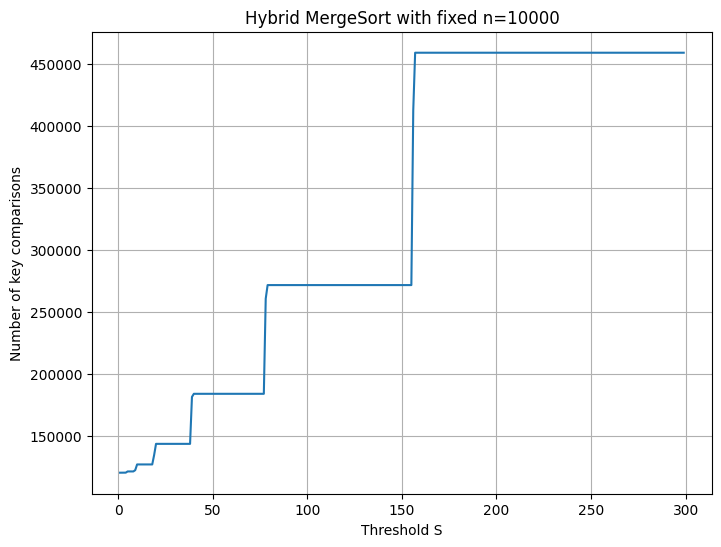

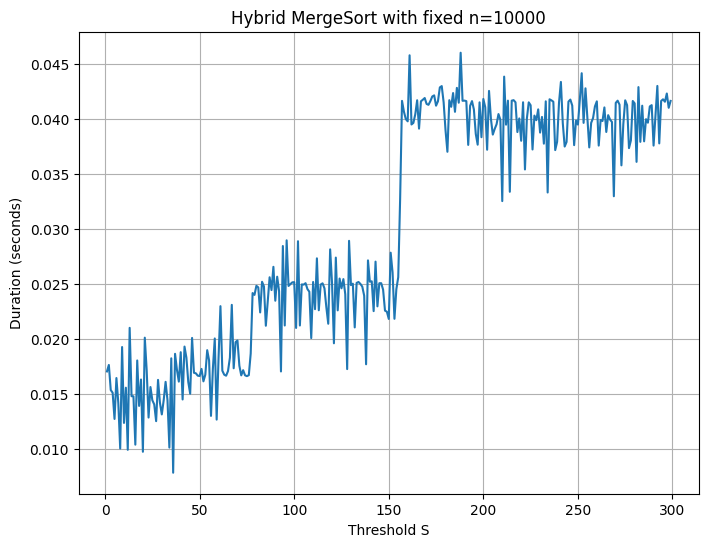

In [37]:
n = 10000
S_values = [x for x in range(1, 300)]
results = []
arr = [random.randint(1, n) for _ in range(n)]
durations = []

for S in S_values:
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    durations.append(end_time - start_time)
    results.append(comparisons)

# Plot
plt.figure(figsize=(8,6))
plt.plot(S_values, results)
plt.xlabel('Threshold S')
plt.ylabel('Number of key comparisons')
plt.title(f"Hybrid MergeSort with fixed n={n}")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(S_values, durations)
plt.xlabel('Threshold S')
plt.ylabel('Duration (seconds)')
plt.title(f"Hybrid MergeSort with fixed n={n}")
plt.grid(True)
plt.show()

In [27]:
n = 100000
S_values = [2, 4, 8, 16, 32, 64, 128, 256]
results = []
durations = []
arr = [random.randint(1, n) for _ in range(n)]

for S in S_values:
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)



##### graph

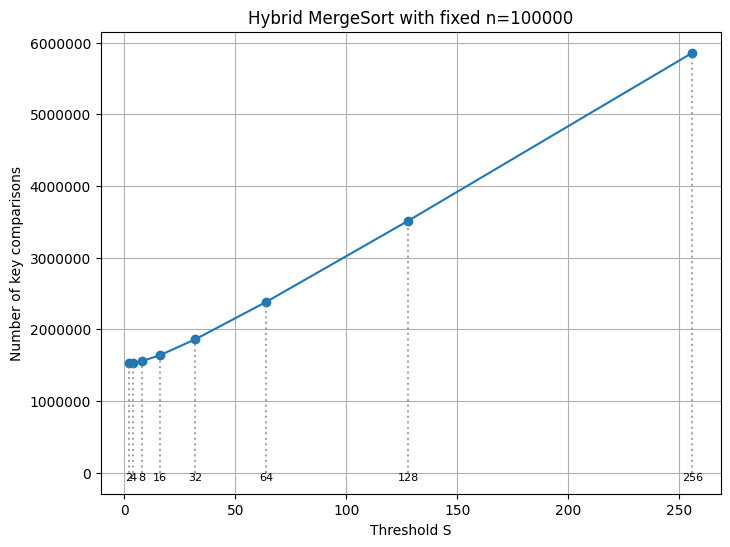

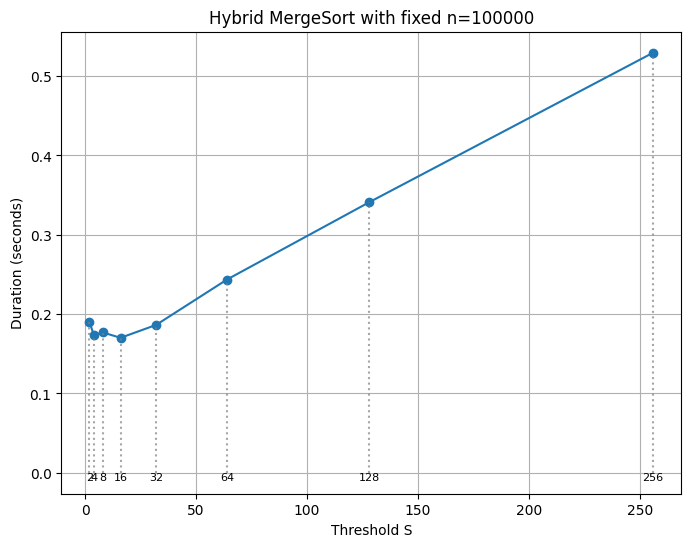

In [30]:
# Plot
plt.figure(figsize=(8,6))
plt.plot(S_values, results, marker="o")
plt.xlabel('Threshold S')
plt.ylabel('Number of key comparisons')
plt.title(f"Hybrid MergeSort with fixed n={n}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# Label each point
for x_val, y_val in zip(S_values, results):
    plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
    plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(S_values, durations, marker="o")
plt.xlabel('Threshold S')
plt.ylabel('Duration (seconds)')
plt.title(f"Hybrid MergeSort with fixed n={n}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# Label each point
for x_val, y_val in zip(S_values, durations):
    plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
    plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
plt.show()

### Finding the optimal S

Small S: Algorithm behaves like standard Mergesort → many recursive calls on small arrays → overhead increases.

Large S: Algorithm behaves more like Insertion Sort → Insertion Sort is O(n²) → slow for large subarrays.

Goal: Find S that minimizes total cost = recursive overhead + Insertion Sort comparisons.

#### Running accross different size of data for different S

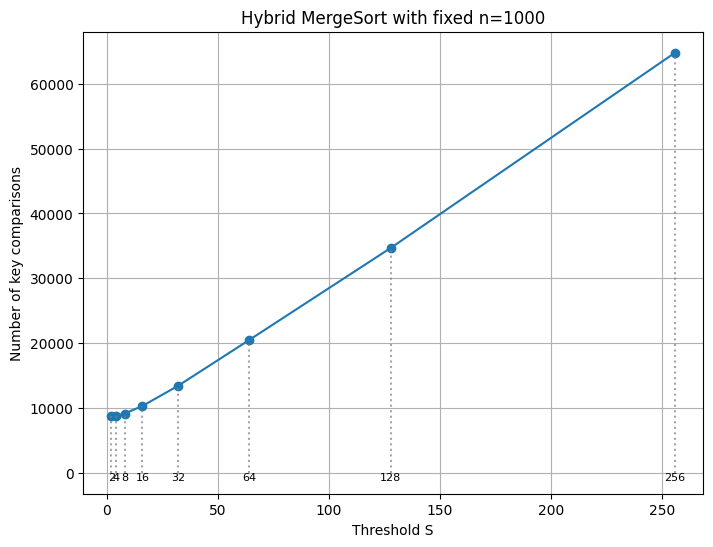

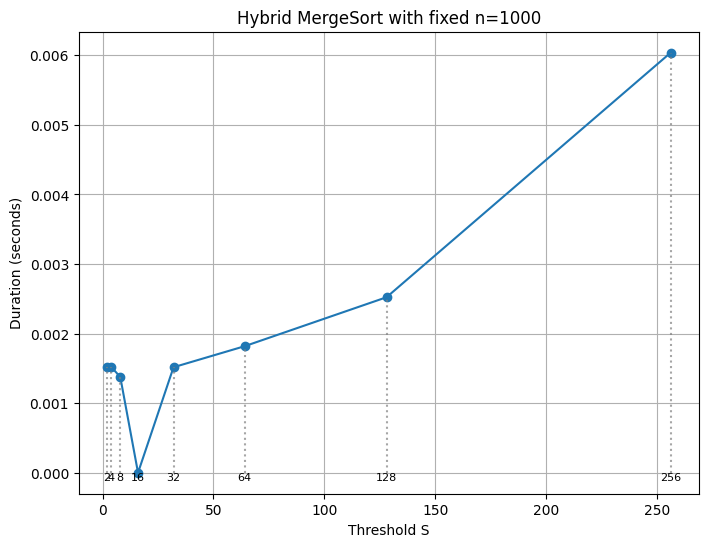

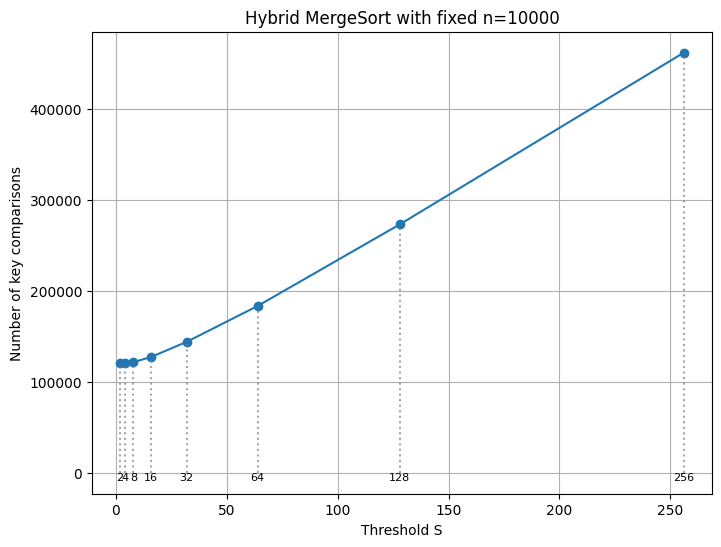

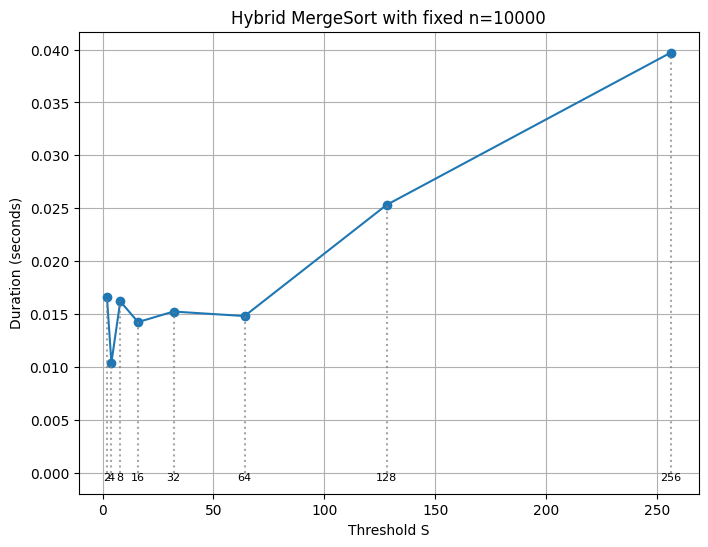

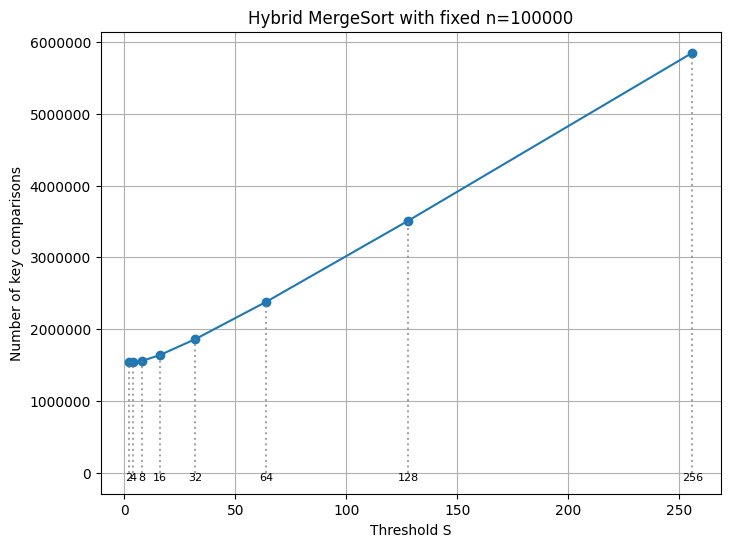

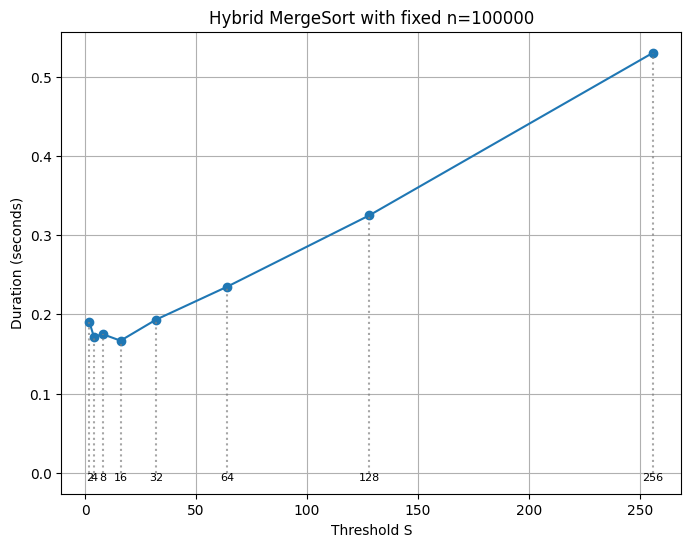

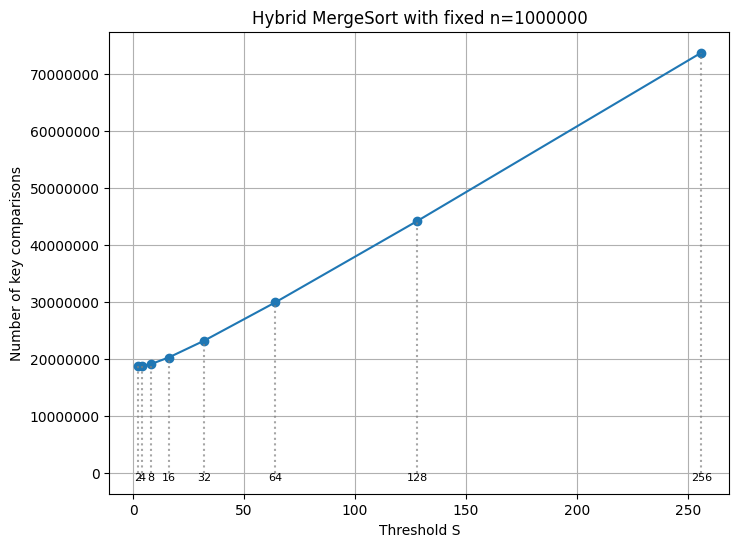

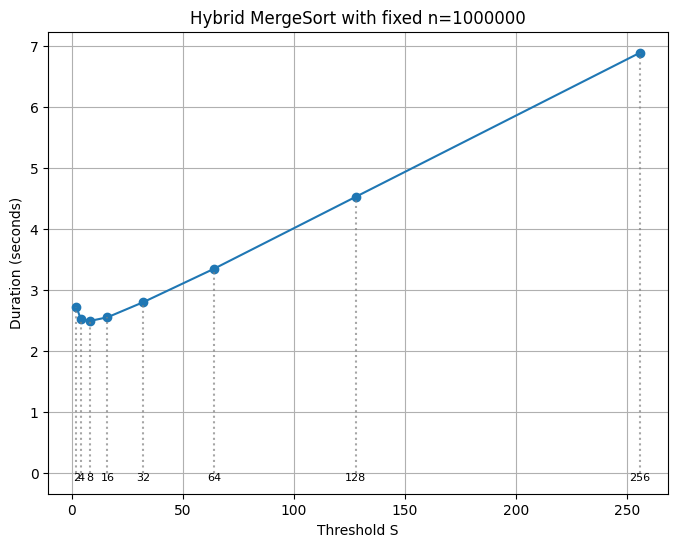

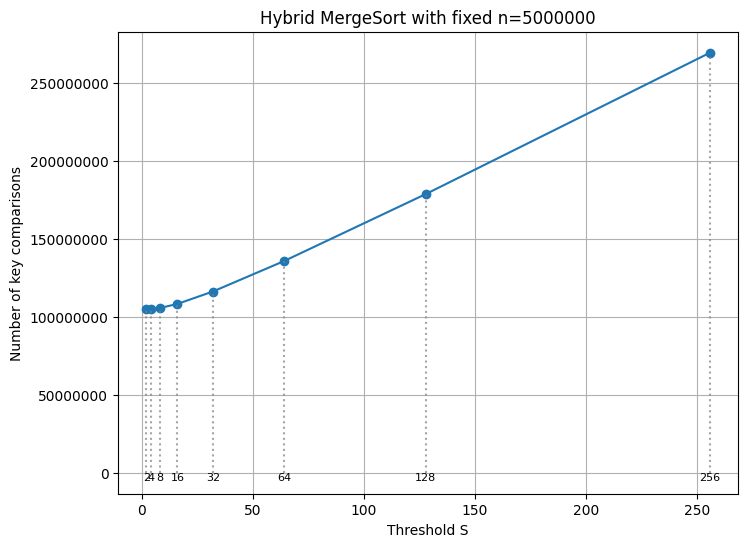

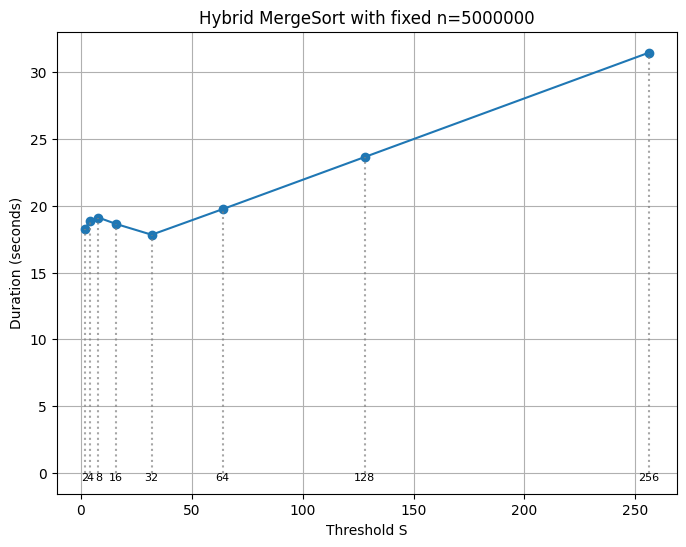

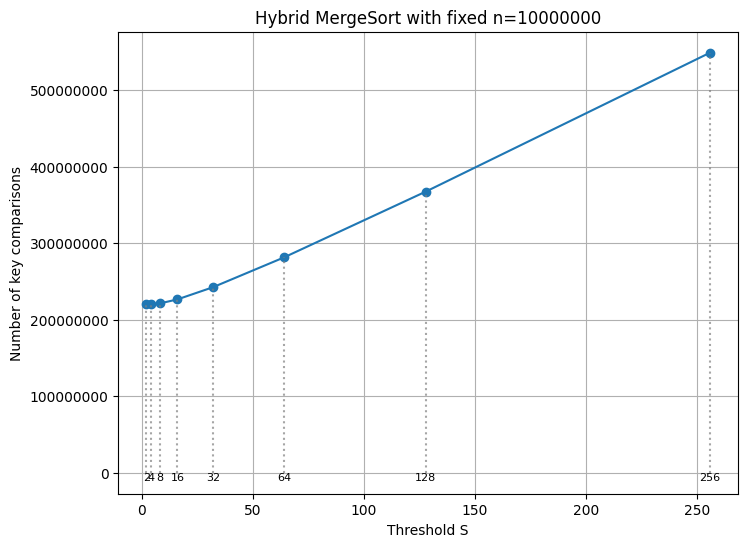

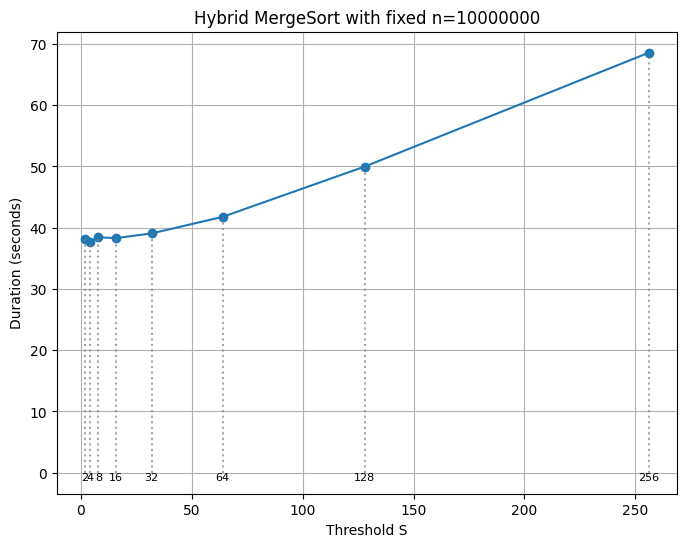

In [8]:
sizes = [1000, 10000, 100000, 1000000, 5000000, 10000000]
for n in sizes:
    S_values = [2, 4, 8, 16, 32, 64, 128, 256]
    results = []
    durations = []
    arr = [random.randint(1, n) for _ in range(n)]

    for S in S_values:
        comparisons = 0
        start_time = time.time()
        hybrid_merge_sort(arr.copy(), 0, n-1, S)
        end_time = time.time()
        results.append(comparisons)
        durations.append(end_time - start_time)

    # Plot
    plt.figure(figsize=(8,6))
    plt.plot(S_values, results, marker="o")
    plt.xlabel('Threshold S')
    plt.ylabel('Number of key comparisons')
    plt.title(f"Hybrid MergeSort with fixed n={n}")
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, results):
        plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
    plt.show()

    plt.figure(figsize=(8,6))
    plt.plot(S_values, durations, marker="o")
    plt.xlabel('Threshold S')
    plt.ylabel('Duration (seconds)')
    plt.title(f"Hybrid MergeSort with fixed n={n}")
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, durations):
        plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
    plt.show()

#### Finding the Optimal S with data size of 10 million

In [ ]:

n = 10000000
repeat = 10
all_results = {S: {"comparisons": [], "duration": []} for S in S_values}
for _ in range(repeat):
    S_values = [2, 4, 8, 16, 32, 64, 128, 256]
    results = []
    durations = []
    arr = [random.randint(1, n) for _ in range(n)]

    for S in S_values:
        comparisons = 0
        start_time = time.time()
        hybrid_merge_sort(arr.copy(), 0, n-1, S)
        end_time = time.time()
        results.append(comparisons)
        durations.append(end_time - start_time)
        all_results[S]["comparisons"].append(comparisons)
        all_results[S]["duration"].append(end_time - start_time)


#### Save to csv file

In [ ]:
# save all result into a csv file
data = []
for S in S_values:
    for i in range(repeat):
        data.append({"S": S, "comparisons": all_results[S]["comparisons"][i], "duration": all_results[S]["duration"][i]})

df = pd.DataFrame(data)
if not os.path.exists("hybrid_mergesort_results.csv"):
    df.to_csv("hybrid_mergesort_results.csv", index=False)
else:
    print("hybrid_mergesort_results.csv already exists. Not overwriting.")

In [ ]:
# load from csv
df = pd.read_csv("hybrid_mergesort_results.csv")

# change back df to all_results
all_results = {S: {"comparisons": [], "duration": []} for S in S_values}
for _, row in df.iterrows():
    S = row["S"]
    all_results[S]["comparisons"].append(row["comparisons"])
    all_results[S]["duration"].append(row["duration"])

#### plot graph

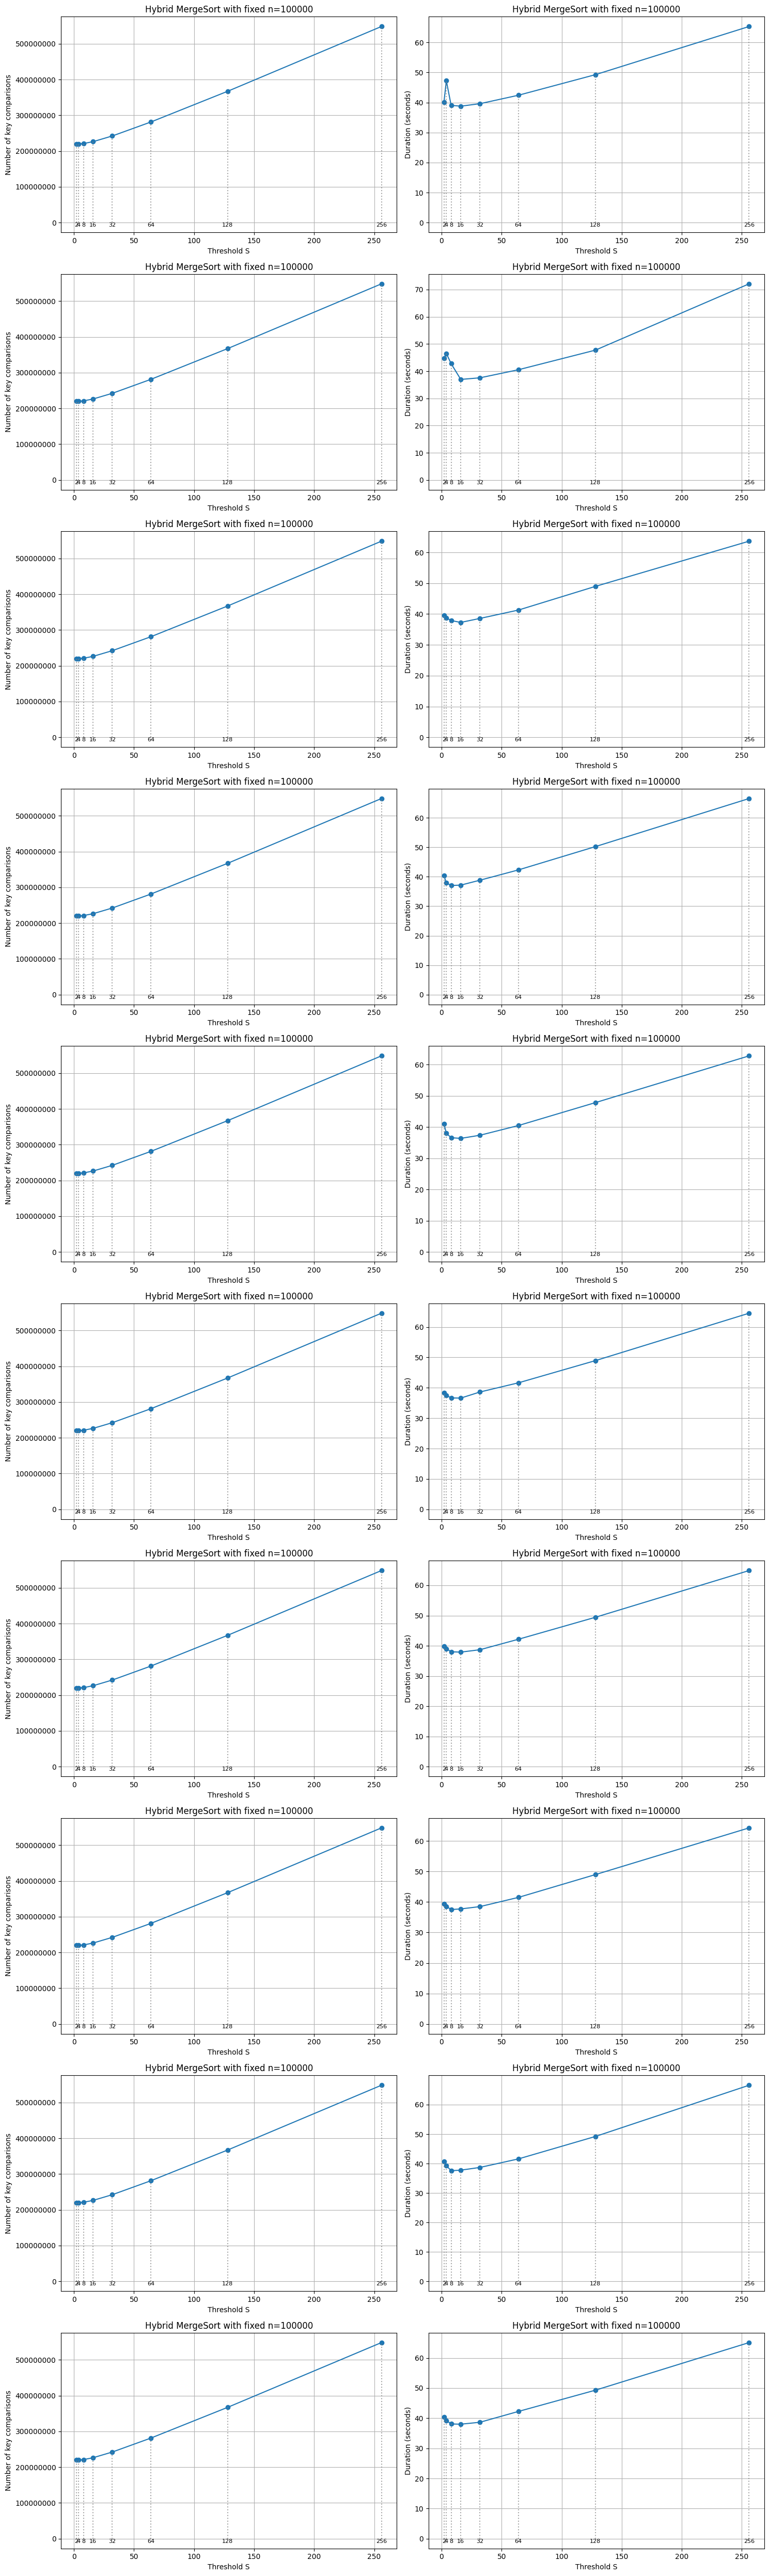

In [47]:
S_values = list(all_results.keys())
repeat = len(all_results[S_values[0]]["comparisons"])

fig, axes = plt.subplots(repeat, 2, figsize=(15,50))
axes = axes.flatten()
for i in range(repeat):
    results = [all_results[S]["comparisons"][i] for S in S_values]
    durations = [all_results[S]["duration"][i] for S in S_values]

    index = i*2
    axes[index].plot(S_values, results, marker="o")
    axes[index].set_xlabel('Threshold S')
    axes[index].set_ylabel('Number of key comparisons')
    axes[index].set_title(f"Hybrid MergeSort with fixed n={n}")
    axes[index].grid(True)
    axes[index].ticklabel_format(style='plain', axis='x')
    axes[index].ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, results):
        axes[index].text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        axes[index].vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)

    axes[index+1].plot(S_values, durations, marker="o")
    axes[index+1].set_xlabel('Threshold S')
    axes[index+1].set_ylabel('Duration (seconds)')
    axes[index+1].set_title(f"Hybrid MergeSort with fixed n={n}")
    axes[index+1].grid(True)
    axes[index+1].ticklabel_format(style='plain', axis='x')
    axes[index+1].ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, durations):
        axes[index+1].text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        axes[index+1].vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)

plt.tight_layout()
plt.show()

#### Summary of the data 

In [ ]:
summary = []
for S in S_values:
    comps = all_results[S]["comparisons"]
    durs = all_results[S]["duration"]
    summary.append({
        "S": S,
        "Avg Comparisons": sum(comps)/len(comps),
        "Std Comparisons": (sum((x - sum(comps)/len(comps))**2 for x in comps)/len(comps))**0.5,
        "Avg Duration (s)": sum(durs)/len(durs),
        "Std Duration (s)": (sum((x - sum(durs)/len(durs))**2 for x in durs)/len(durs))**0.5
    })

df = pd.DataFrame(summary)
print(df)


     S  Avg Comparisons  Std Comparisons  Avg Duration (s)  Std Duration (s)
0    2      220101225.5      1811.562765         40.445093          1.626108
1    4      220222363.9      2222.551347         40.230514          3.375510
2    8      221108401.7      2630.757079         38.121642          1.698744
3   16      226417546.8      4146.221576         37.456826          0.678230
4   32      242309219.4      7500.944170         38.510645          0.592479
5   64      281236878.1     11639.424414         41.616345          0.657042
6  128      367344066.5     44431.415805         48.979672          0.688715
7  256      548474324.9     71719.328747         65.584877          2.439013


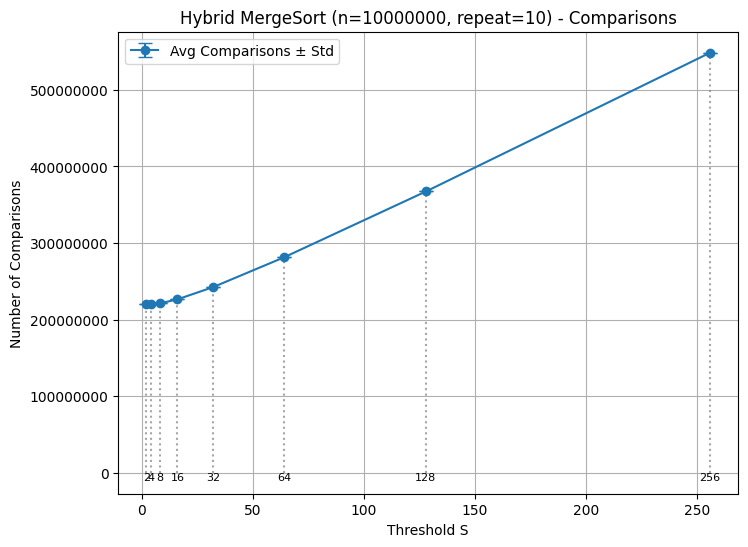

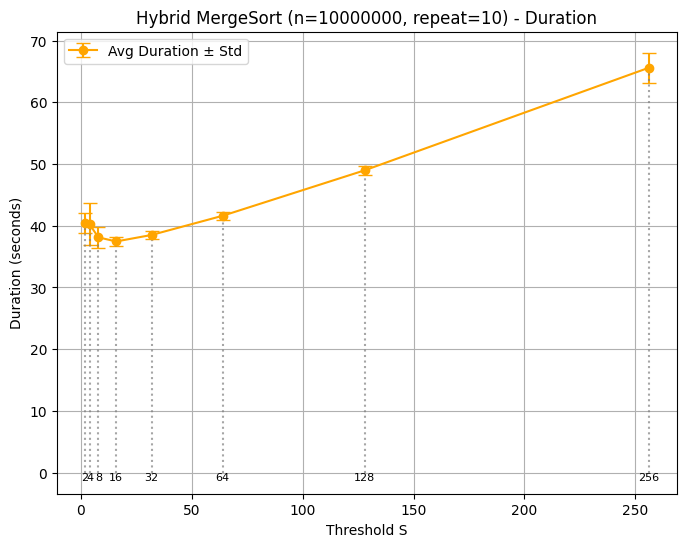

In [ ]:
summary = []
for S in S_values:
    comps = all_results[S]["comparisons"]
    durs = all_results[S]["duration"]
    avg_c = np.mean(comps)
    std_c = np.std(comps)
    avg_d = np.mean(durs)
    std_d = np.std(durs)
    summary.append((S, avg_c, std_c, avg_d, std_d))

# Convert to numpy arrays for plotting
S_plot = [row[0] for row in summary]
avg_comps = [row[1] for row in summary]
std_comps = [row[2] for row in summary]
avg_durs = [row[3] for row in summary]
std_durs = [row[4] for row in summary]

# Plot comparisons
plt.figure(figsize=(8,6))
plt.errorbar(S_plot, avg_comps, yerr=std_comps, fmt='-o', capsize=5, label="Avg Comparisons ± Std")
plt.xlabel("Threshold S")
plt.ylabel("Number of Comparisons")
plt.title(f"Hybrid MergeSort (n={n}, repeat={repeat}) - Comparisons")
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# Label each point
for x_val, y_val in zip(S_plot, avg_comps):
    plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
    plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
plt.show()

# Plot durations
plt.figure(figsize=(8,6))
plt.errorbar(S_plot, avg_durs, yerr=std_durs, fmt='-o', capsize=5, color="orange", label="Avg Duration ± Std")
plt.xlabel("Threshold S")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort (n={n}, repeat={repeat}) - Duration")
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
# Label each point
for x_val, y_val in zip(S_plot, avg_durs):
    plt.text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
    plt.vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)
plt.show()

## Compare with original Mergesort

In [ ]:
n = 10000000 # 10 million
optimal_S = 16  
repeat = 10
results = {"Hybrid": {"time": [], "comparisons": []},
           "Original": {"time": [], "comparisons": []}}

for i in range(repeat):
    arr = [random.randint(1, n) for _ in range(n)]
    print(f"Run {i+1}/{repeat}")
    # Hybrid
    comparisons = 0
    start = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, optimal_S)
    results["Hybrid"]["time"].append(time.time() - start)
    results["Hybrid"]["comparisons"].append(comparisons)
    print(f"Hybrid Mergesort: time={time.time() - start}, comparisons={comparisons}")

    # Original
    comparisons = 0
    start = time.time()
    mergesort(arr.copy(), 0, n-1)
    results["Original"]["time"].append(time.time() - start)
    results["Original"]["comparisons"].append(comparisons)
    print(f"Original Mergesort: time={time.time() - start}, comparisons={comparisons}")

Run 1/10
Hybrid Mergesort: time=38.26757335662842, comparisons=226421351
Original Mergesort: time=40.10555052757263, comparisons=220098525
Run 2/10
Hybrid Mergesort: time=37.22015190124512, comparisons=226418363
Original Mergesort: time=39.47739291191101, comparisons=220104042
Run 3/10
Hybrid Mergesort: time=37.05335354804993, comparisons=226419812
Original Mergesort: time=42.42358613014221, comparisons=220100424
Run 4/10
Hybrid Mergesort: time=40.50927257537842, comparisons=226418084
Original Mergesort: time=41.386160135269165, comparisons=220100154
Run 5/10
Hybrid Mergesort: time=37.03237271308899, comparisons=226428380
Original Mergesort: time=39.4841582775116, comparisons=220099830
Run 6/10
Hybrid Mergesort: time=36.92222452163696, comparisons=226415591
Original Mergesort: time=39.13290739059448, comparisons=220099547
Run 7/10
Hybrid Mergesort: time=36.69655919075012, comparisons=226425028
Original Mergesort: time=39.388188123703, comparisons=220098796
Run 8/10
Hybrid Mergesort: ti

#### save to cvs file

In [ ]:
# save results to csv
data = []
for algo in results:
    for i in range(repeat):
        data.append({"Algorithm": algo, "Time (s)": results[algo]["time"][i], "Comparisons": results[algo]["comparisons"][i]})

df = pd.DataFrame(data)
# if file exists, stop it from overwriting
if not os.path.exists("mergesort_and_hybrid_results.csv"):
    df.to_csv("mergesort_and_hybrid_results.csv", index=False)
else:
    print("mergesort_and_hybrid_results.csv already exists. Not overwriting.")

In [ ]:
# load from csv

df = pd.read_csv("mergesort_and_hybrid_results.csv")

# change back df to results
results = {"Hybrid": {"time": [], "comparisons": []},
           "Original": {"time": [], "comparisons": []}}

for _, row in df.iterrows():
    algo = row["Algorithm"]
    results[algo]["time"].append(row["Time (s)"])
    results[algo]["comparisons"].append(row["Comparisons"])

#### Visualize

In [34]:
summary = []
for algo in ["Hybrid", "Original"]:
    t = results[algo]["time"]
    c = results[algo]["comparisons"]
    summary.append({
        "Algorithm": algo,
        "Avg Time (s)": np.mean(t),
        "Std Time (s)": np.std(t),
        "Avg Comparisons": np.mean(c),
        "Std Comparisons": np.std(c)
    })

df = pd.DataFrame(summary)
print(df)

  Algorithm  Avg Time (s)  Std Time (s)  Avg Comparisons  Std Comparisons
0    Hybrid     37.505419      1.140342      226419680.3      4162.965459
1  Original     40.049618      1.039571      220100768.0      1721.065600


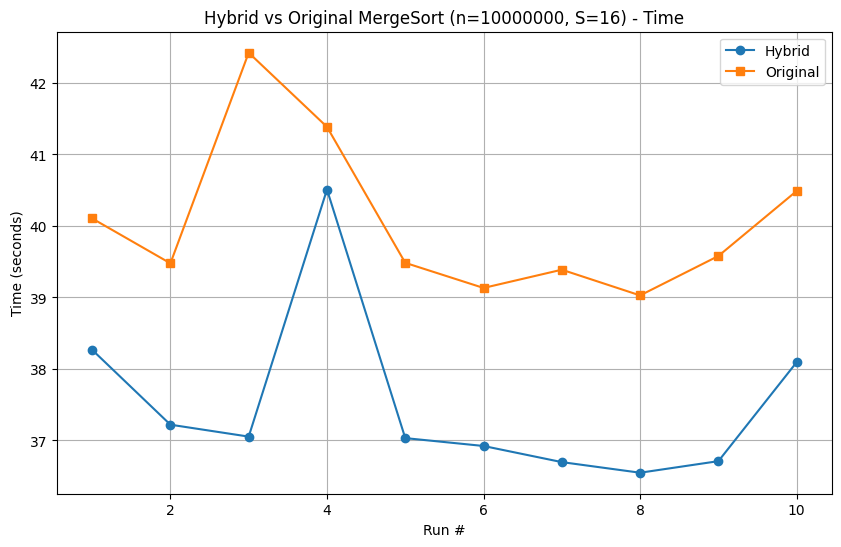

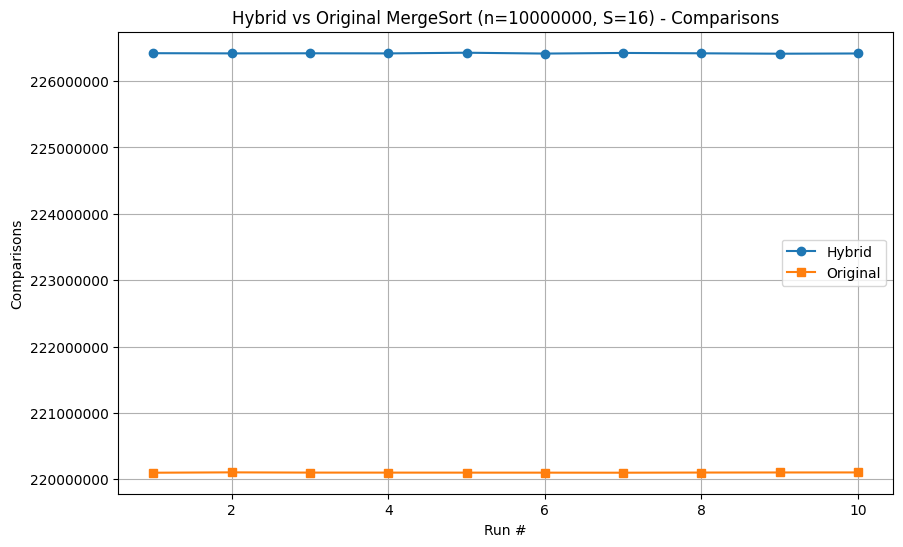

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(range(1, repeat+1), results["Hybrid"]["time"], marker="o", label="Hybrid")
plt.plot(range(1, repeat+1), results["Original"]["time"], marker="s", label="Original")
plt.xlabel("Run #")
plt.ylabel("Time (seconds)")
plt.title(f"Hybrid vs Original MergeSort (n={n}, S={optimal_S}) - Time")
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
plt.plot(range(1, repeat+1), results["Hybrid"]["comparisons"], marker="o", label="Hybrid")
plt.plot(range(1, repeat+1), results["Original"]["comparisons"], marker="s", label="Original")
plt.xlabel("Run #")
plt.ylabel("Comparisons")
plt.title(f"Hybrid vs Original MergeSort (n={n}, S={optimal_S}) - Comparisons")
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.grid(True)
plt.show()

### Testing

In [49]:
S_values = [2, 4, 8, 16, 32, 64, 128, 256]
n = 1000000
repeat = 10
all_results = {S: {"comparisons": [], "duration": []} for S in S_values}
original_results = {"comparisons": [], "duration": []}
for _ in range(repeat):
    results = []
    durations = []
    arr = [random.randint(1, n) for _ in range(n)]

    for S in S_values:
        comparisons = 0
        start_time = time.time()
        hybrid_merge_sort(arr.copy(), 0, n-1, S)
        end_time = time.time()
        results.append(comparisons)
        durations.append(end_time - start_time)
        all_results[S]["comparisons"].append(comparisons)
        all_results[S]["duration"].append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

    print(f"Completed run {_+1}/{repeat}")

Completed run 1/10
Completed run 2/10
Completed run 3/10
Completed run 4/10
Completed run 5/10
Completed run 6/10
Completed run 7/10
Completed run 8/10
Completed run 9/10
Completed run 10/10


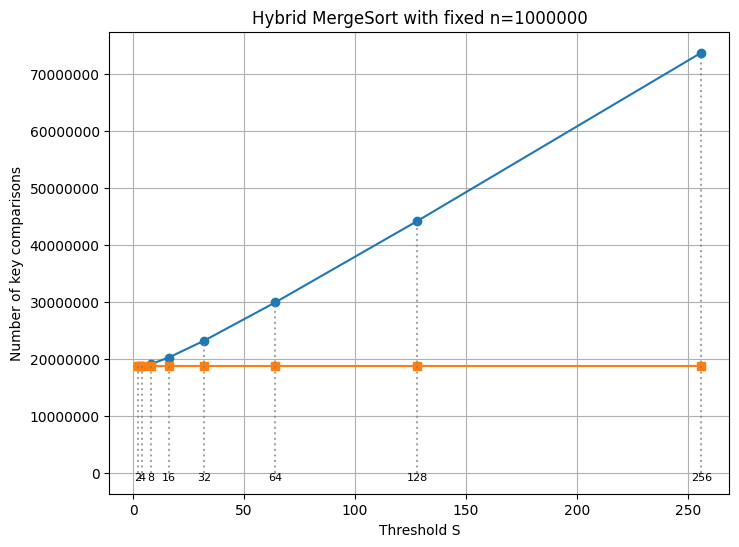

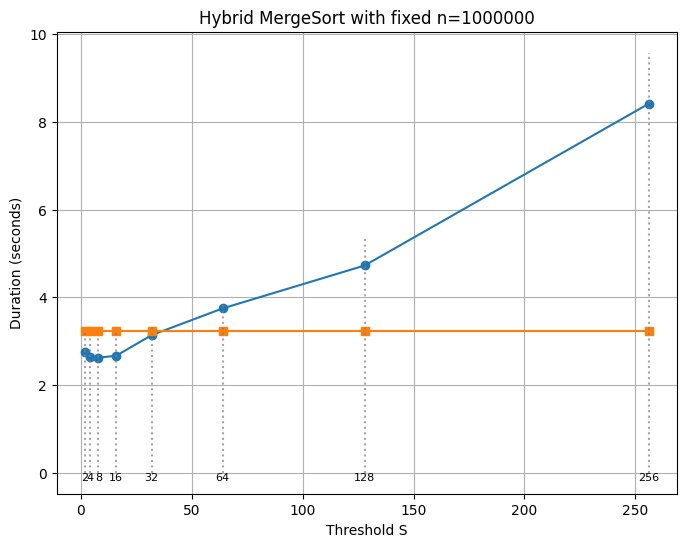

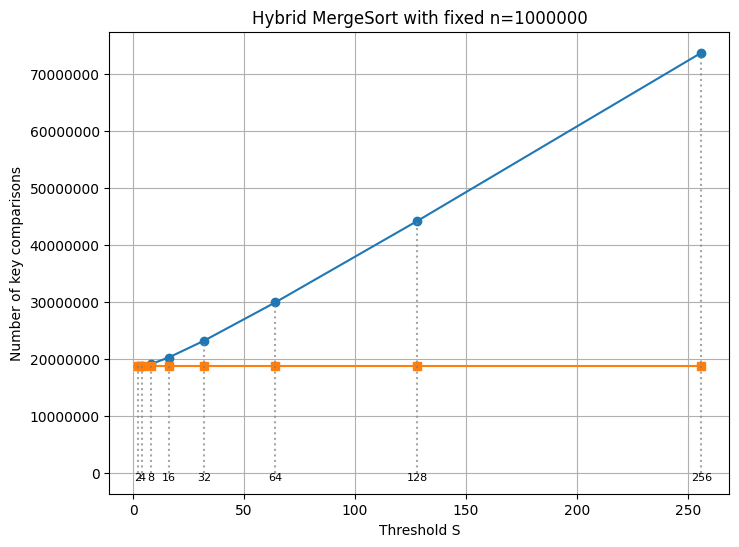

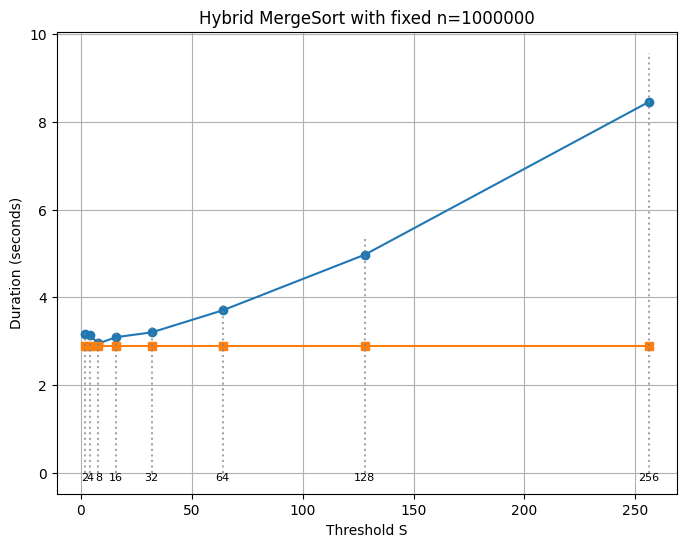

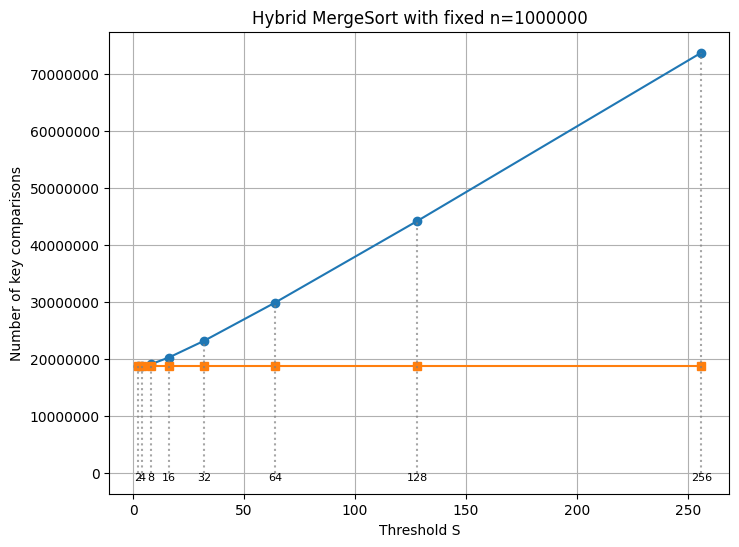

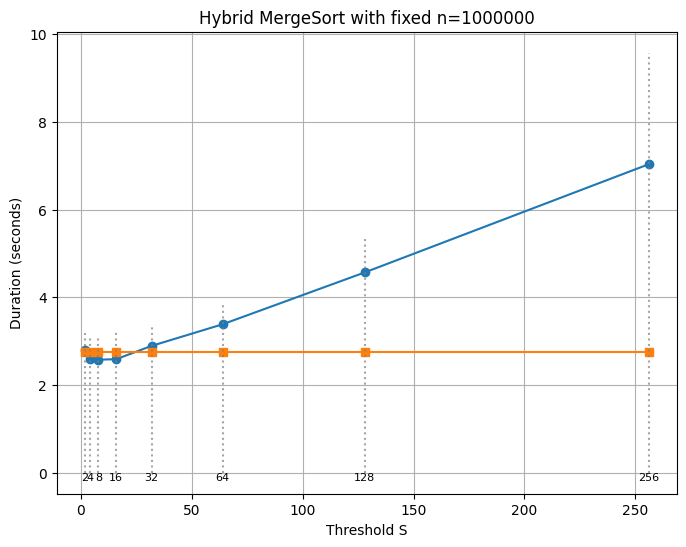

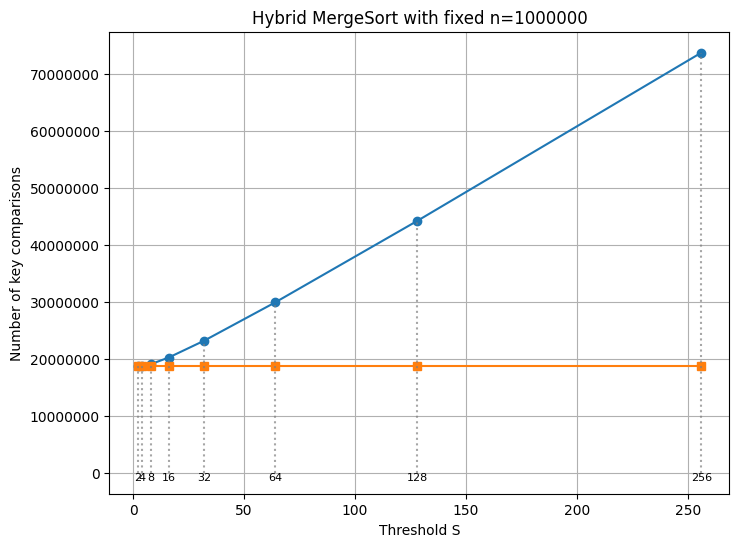

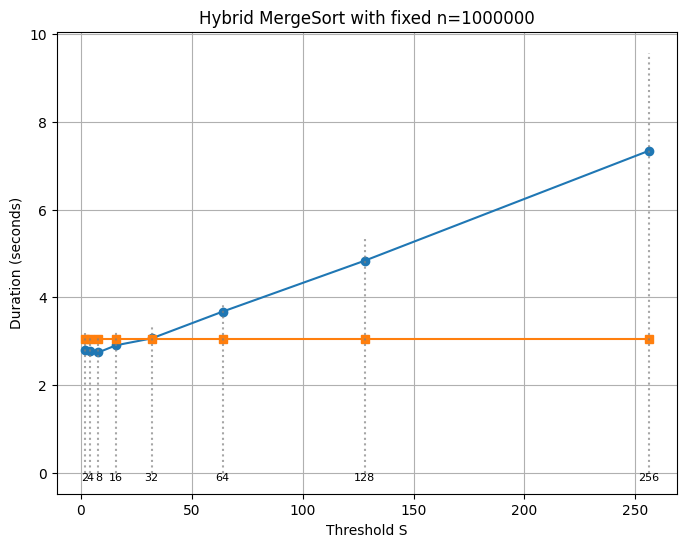

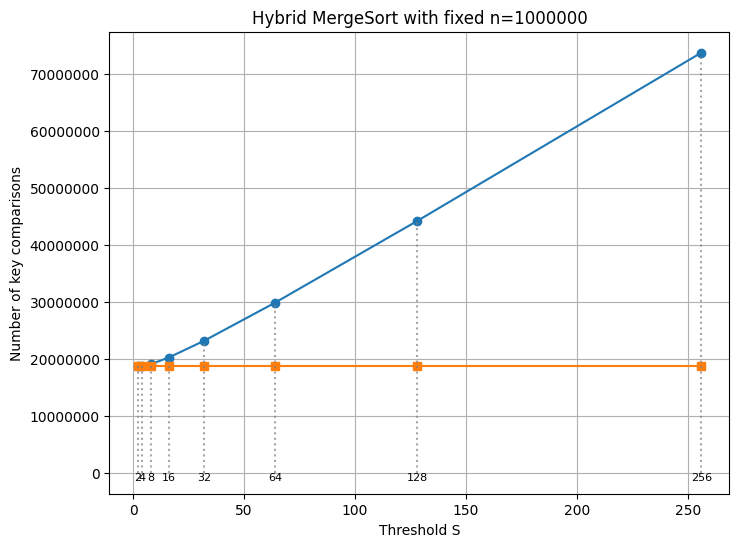

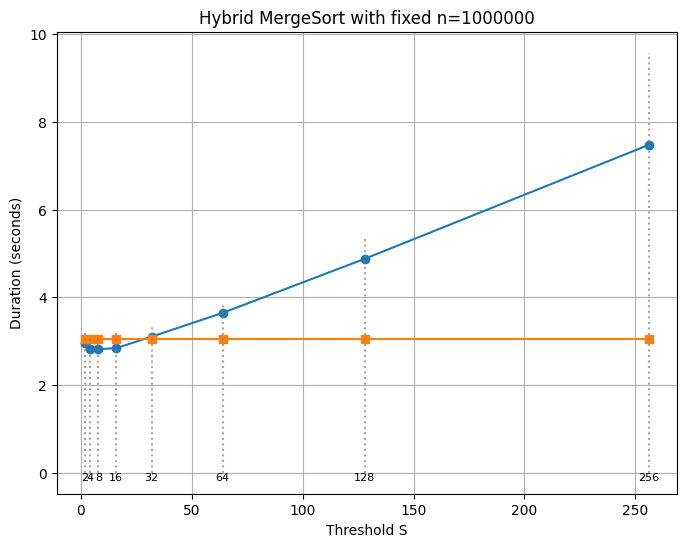

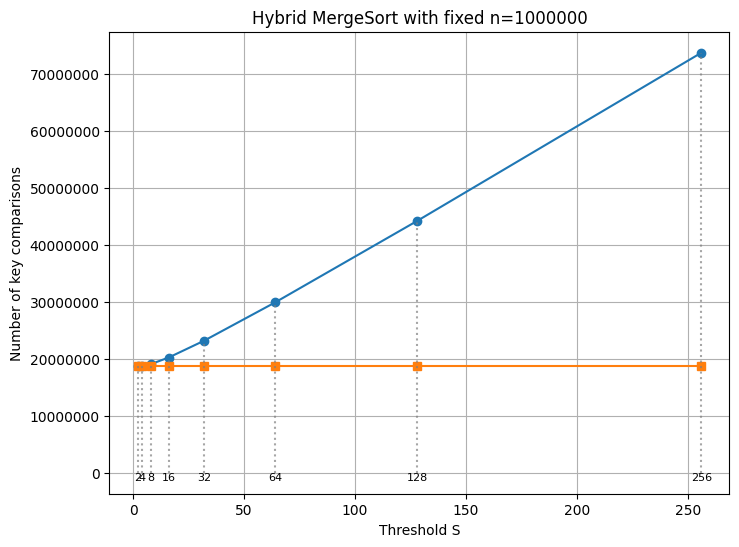

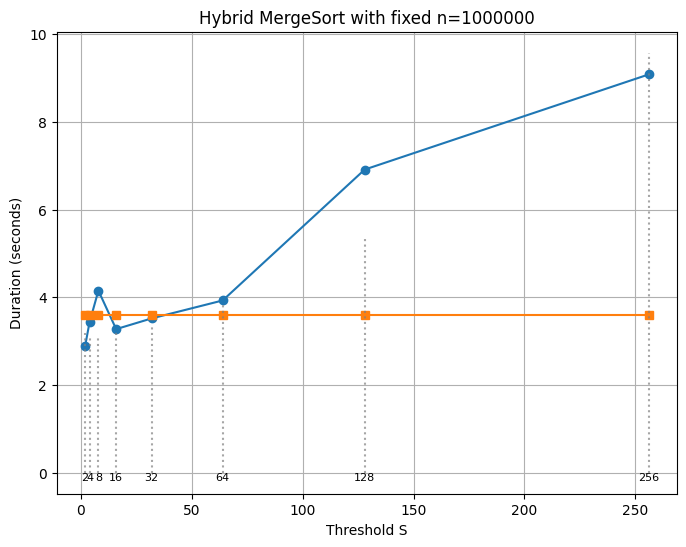

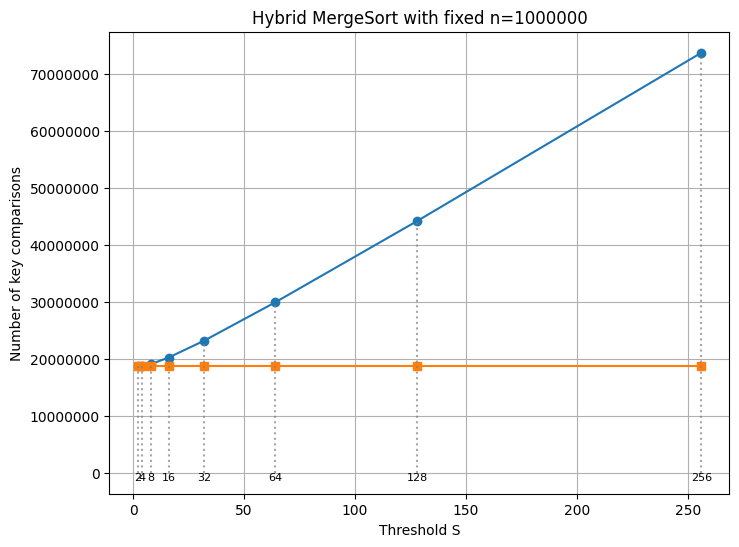

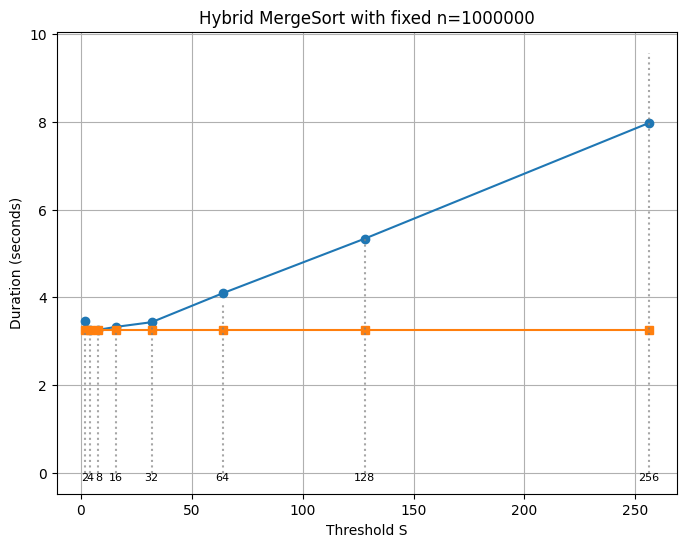

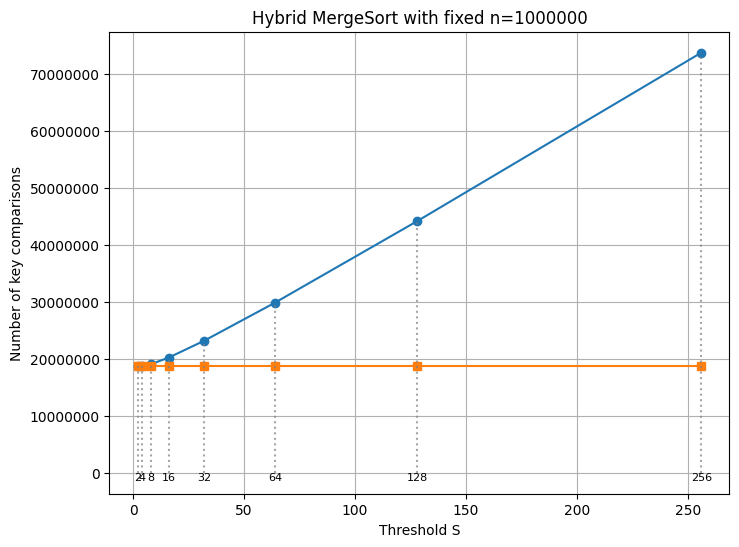

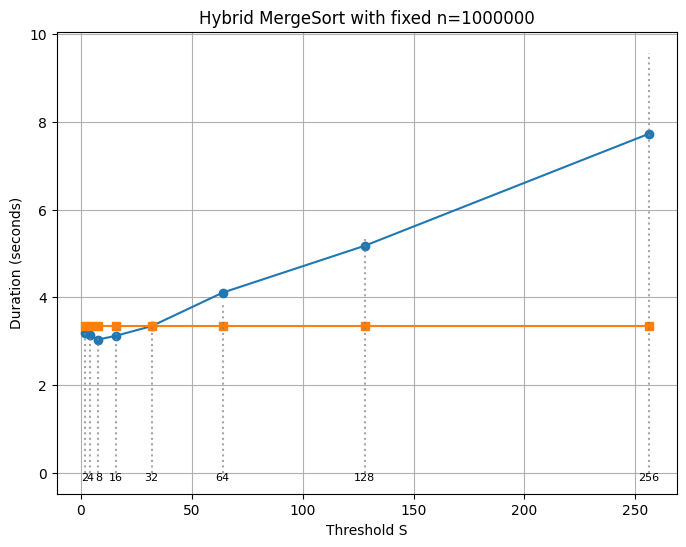

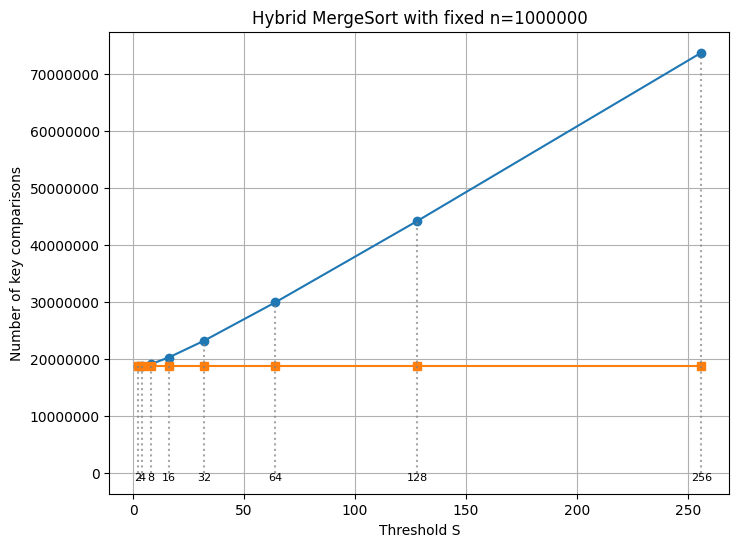

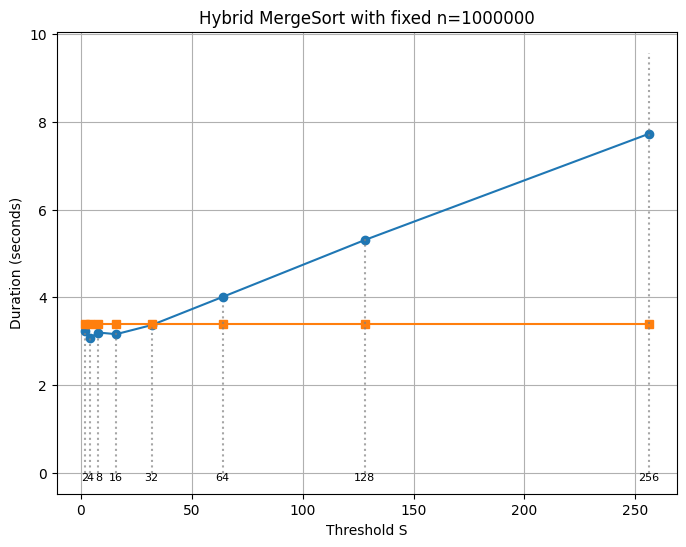

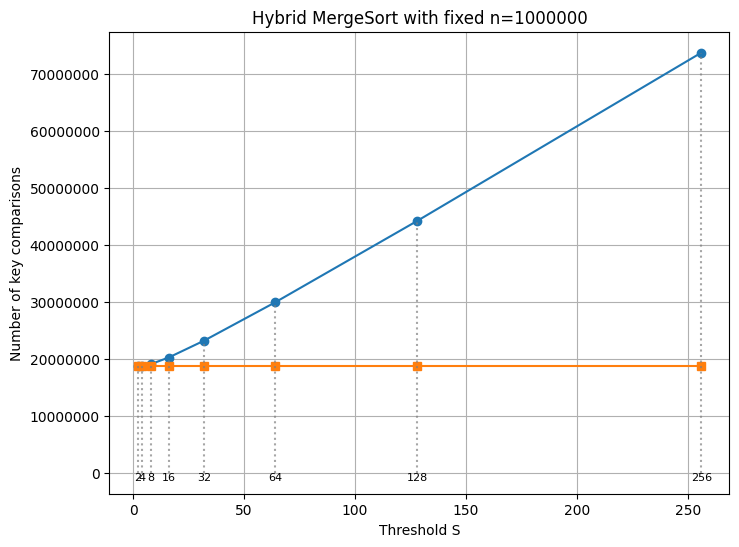

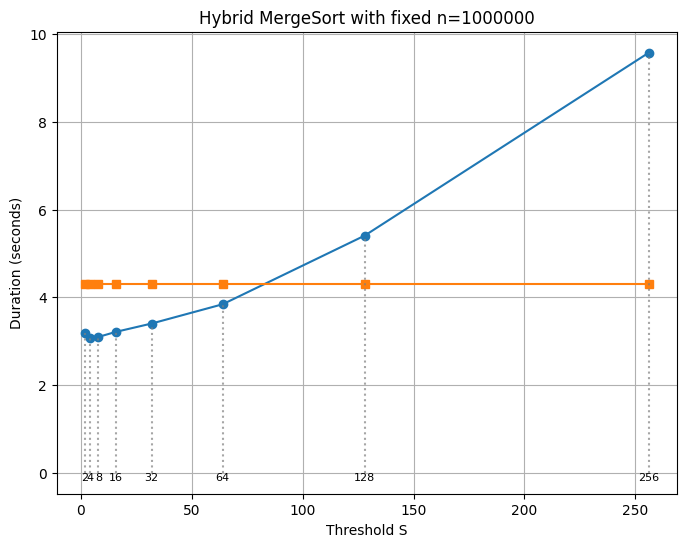

In [ ]:
fig, axes = plt.subplots(repeat, 2, figsize=(15,50))
axes = axes.flatten()

for i in range(repeat):
    axes[i*2].plot(S_values, [all_results[S]["comparisons"][i] for S in S_values], marker="o", label="Hybrid")
    axes[i*2].plot(S_values, [original_results["comparisons"][i] for _ in S_values], marker="s", label="MergeSort")
    axes[i*2].set_xlabel('Threshold S')
    axes[i*2].set_ylabel('Number of key comparisons')
    axes[i*2].set_title(f"Hybrid MergeSort with fixed n={n}")
    axes[i*2].grid(True)
    axes[i*2].ticklabel_format(style='plain', axis='x')
    axes[i*2].ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, results):
        axes[i*2].text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        axes[i*2].vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)

    axes[i*2+1].plot(S_values, [all_results[S]["duration"][i] for S in S_values], marker="o", label="Hybrid")
    axes[i*2+1].plot(S_values, [original_results["duration"][i] for _ in S_values], marker="s", label="MergeSort")
    axes[i*2+1].set_xlabel('Threshold S')
    axes[i*2+1].set_ylabel('Duration (seconds)')
    axes[i*2+1].set_title(f"Hybrid MergeSort with fixed n={n}")
    axes[i*2+1].grid(True)
    axes[i*2+1].ticklabel_format(style='plain', axis='x')
    axes[i*2+1].ticklabel_format(style='plain', axis='y')
    # Label each point
    for x_val, y_val in zip(S_values, durations):
        axes[i*2+1].text(x_val, 0, str(x_val), fontsize=8, ha='center', va='top')
        axes[i*2+1].vlines(x=x_val, ymin=0, ymax=y_val, colors='gray', linestyles='dotted', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
summary = []

for S in S_values:
    comps = all_results[S]["comparisons"]
    durs = all_results[S]["duration"]
    summary.append({
        "S": S,
        "Avg Comparisons": sum(comps)/len(comps),
        "Std Comparisons": (sum((x - sum(comps)/len(comps))**2 for x in comps)/len(comps))**0.5,
        "Avg Duration (s)": sum(durs)/len(durs),
        "Std Duration (s)": (sum((x - sum(durs)/len(durs))**2 for x in durs)/len(durs))**0.5
    })


df = pd.DataFrame(summary)
print(df)

avg_original_comparisons = np.mean(original_results["comparisons"])
std_original_comparisons = np.std(original_results["comparisons"])
avg_original_duration = np.mean(original_results["duration"])
std_original_duration = np.std(original_results["duration"])

print(f"Original MergeSort - Avg Comparisons: {avg_original_comparisons}, Std Comparisons: {std_original_comparisons}")
print(f"Original MergeSort - Avg Duration (s): {avg_original_duration}, Std Duration (s): {std_original_duration}")

     S  Avg Comparisons  Std Comparisons  Avg Duration (s)  Std Duration (s)
0    2       18674375.1       621.890899          3.042778          0.226591
1    4       18727566.1       444.523666          2.995885          0.257320
2    8       19072771.7       769.604320          3.045373          0.429666
3   16       20224131.2      1555.859171          3.019024          0.242288
4   32       23186183.0      3926.456953          3.245706          0.187172
5   64       29899657.0      9781.917655          3.812786          0.215364
6  128       44203257.0     15409.739070          5.210957          0.626195
7  256       73750820.1     29987.010249          8.080014          0.759225
Original MergeSort - Avg Comparisons: 18674375.1, Std Comparisons: 621.8908987917414
Original MergeSort - Avg Duration (s): 3.2845684051513673, Std Duration (s): 0.4106312572361624


In [15]:
S = 0
sizes = [x for x in range(1000, 1000001, 50000)]
results = []
durations = []

for n in sizes:
    arr = [random.randint(1, n) for _ in range(n)]
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr, 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)



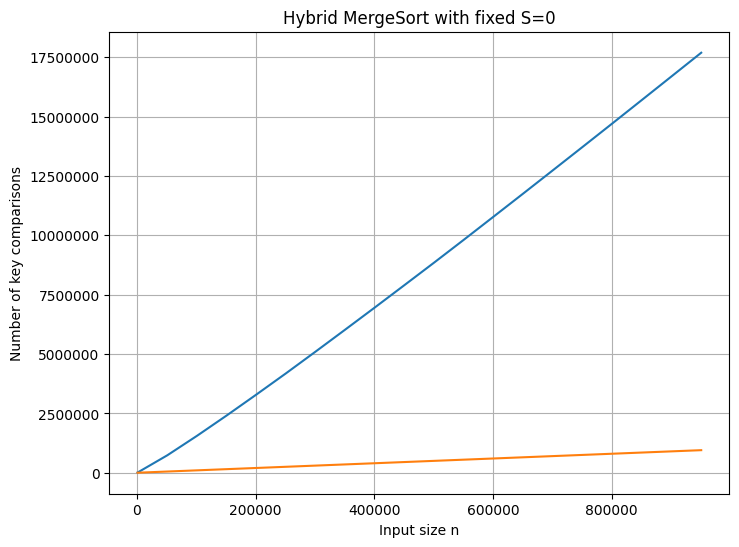

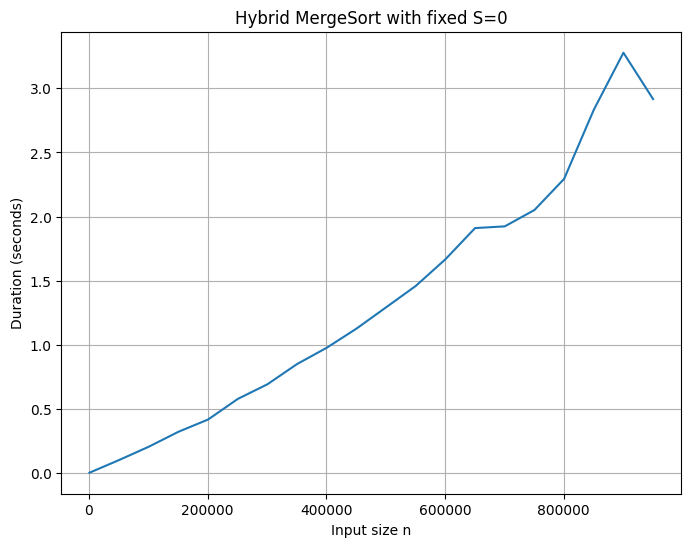

In [ ]:
# Plot
plt.figure(figsize=(8,6))
plt.plot(sizes, results)
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(8,6))
plt.plot(sizes, durations)
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

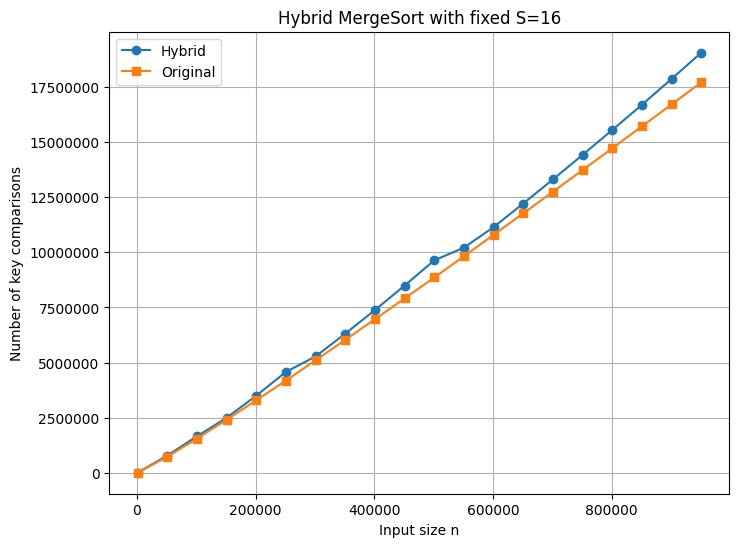

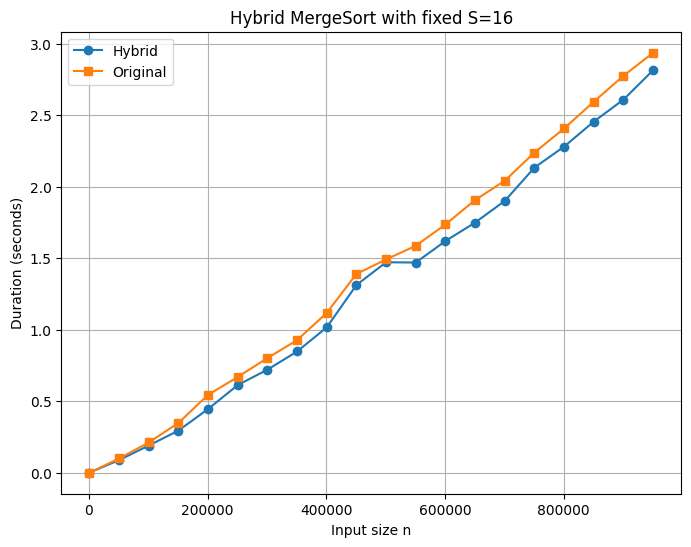

In [27]:
S = 16
sizes = [x for x in range(1000, 1000001, 50000)]
results = []
durations = []
original_results = {"comparisons": [], "duration": []}

for n in sizes:
    arr = [random.randint(1, n) for _ in range(n)]
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

# Plot
plt.figure(figsize=(8,6))
plt.plot(sizes, results, marker="o", label="Hybrid")
plt.plot(sizes, original_results["comparisons"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(sizes, durations, marker="o", label="Hybrid")
plt.plot(sizes, original_results["duration"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

### Best Case

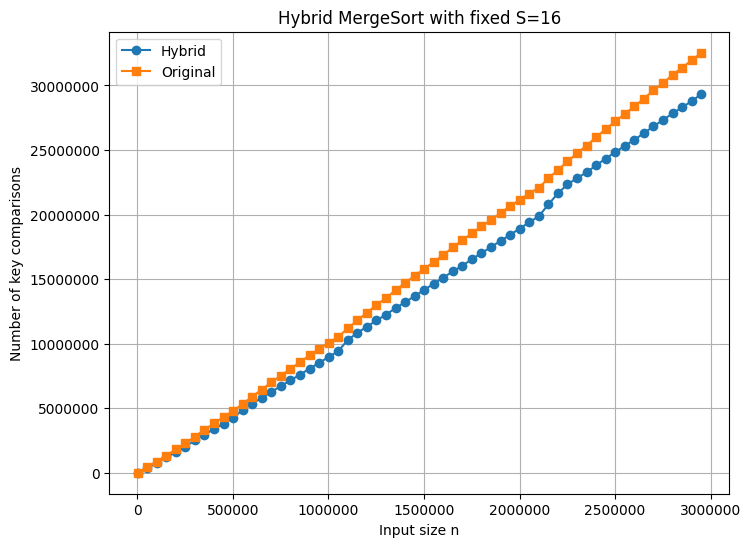

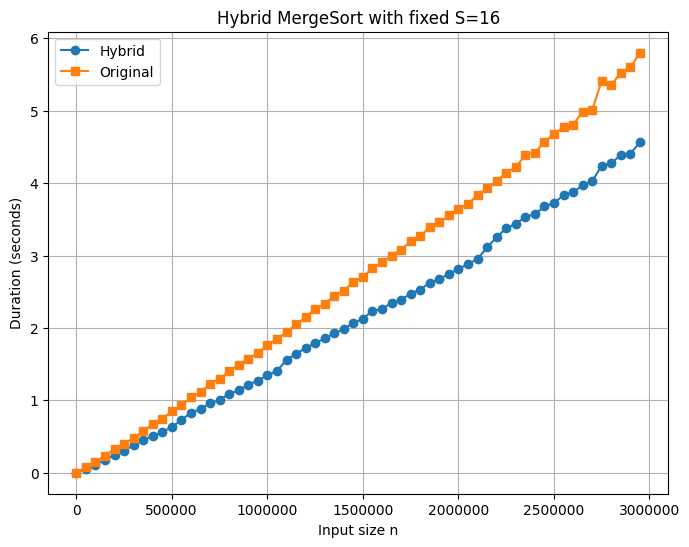

In [32]:
S = 16
sizes = [x for x in range(1000, 3000001, 50000)]
results = []
durations = []
original_results = {"comparisons": [], "duration": []}

for n in sizes:
    arr = [x for x in range(1, n+1)]
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

# Plot
plt.figure(figsize=(8,6))
plt.plot(sizes, results, marker="o", label="Hybrid")
plt.plot(sizes, original_results["comparisons"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(sizes, durations, marker="o", label="Hybrid")
plt.plot(sizes, original_results["duration"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

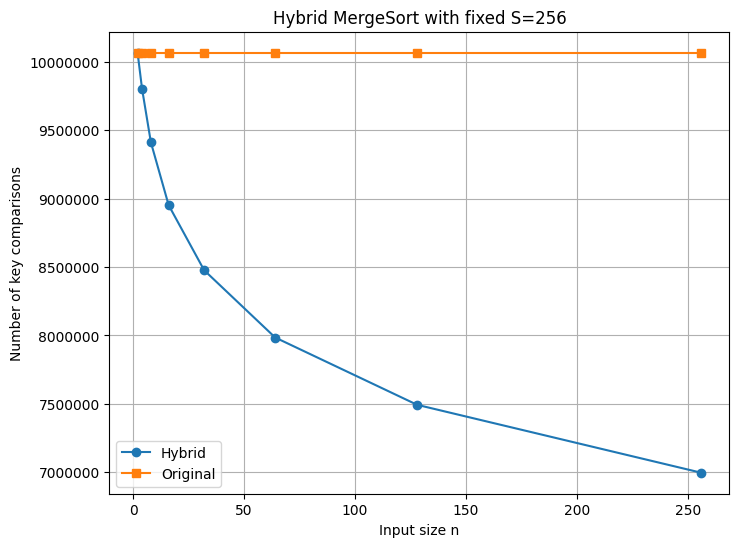

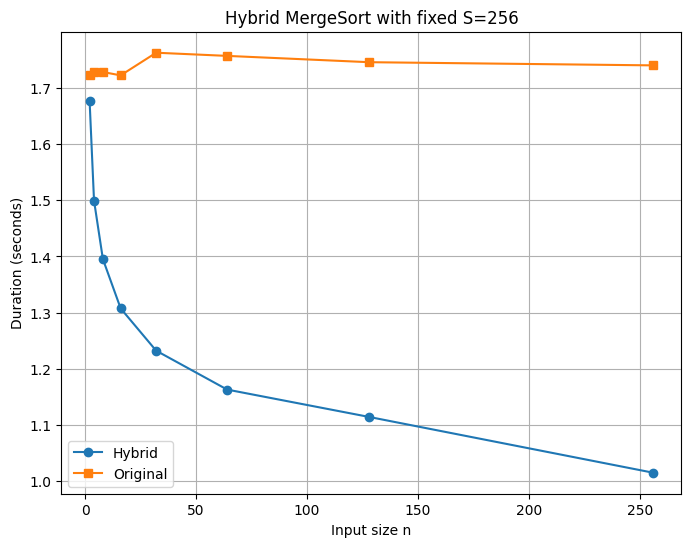

In [ ]:
S_values = [2, 4, 8, 16, 32, 64, 128, 256]
n = 1000000
results = []
durations = []
original_results = {"comparisons": [], "duration": []}
arr = [x for x in range(1, n+1)]

for S in S_values:
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

# Plot
plt.figure(figsize=(8,6))
plt.plot(S_values, results, marker="o", label="Hybrid")
plt.plot(S_values, original_results["comparisons"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(S_values, durations, marker="o", label="Hybrid")
plt.plot(S_values, original_results["duration"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

### Worst Case

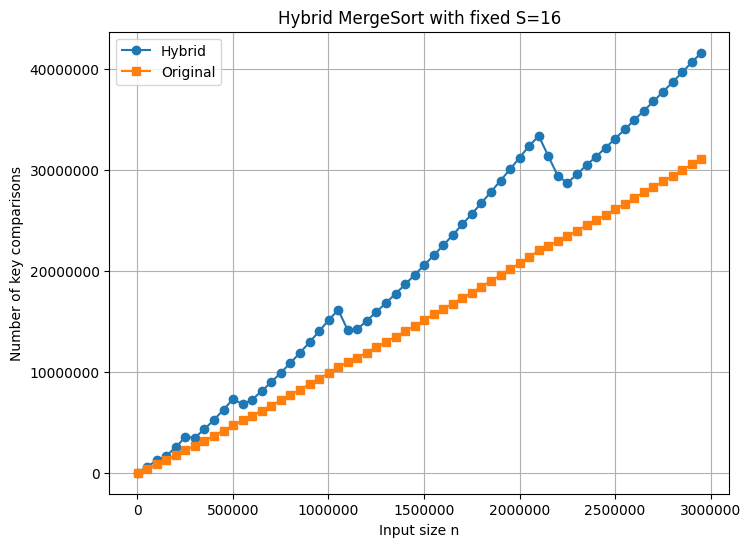

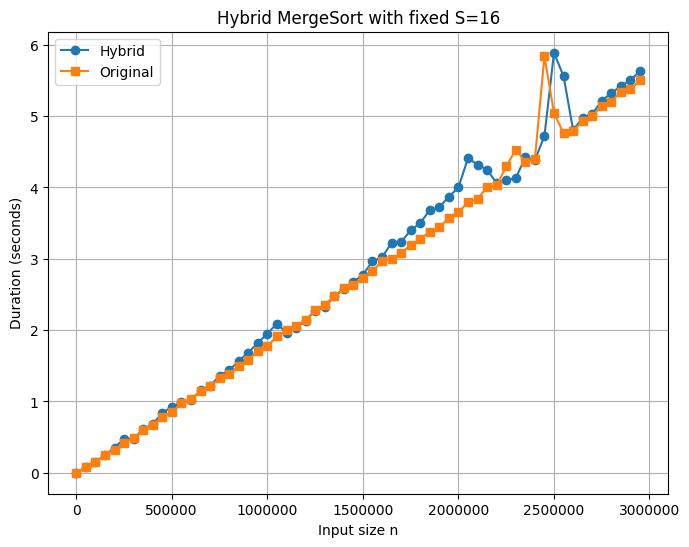

In [33]:
S = 16
sizes = [x for x in range(1000, 3000001, 50000)]
results = []
durations = []
original_results = {"comparisons": [], "duration": []}

for n in sizes:
    arr = [x for x in range(n, 0, -1)]
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

# Plot
plt.figure(figsize=(8,6))
plt.plot(sizes, results, marker="o", label="Hybrid")
plt.plot(sizes, original_results["comparisons"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(sizes, durations, marker="o", label="Hybrid")
plt.plot(sizes, original_results["duration"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

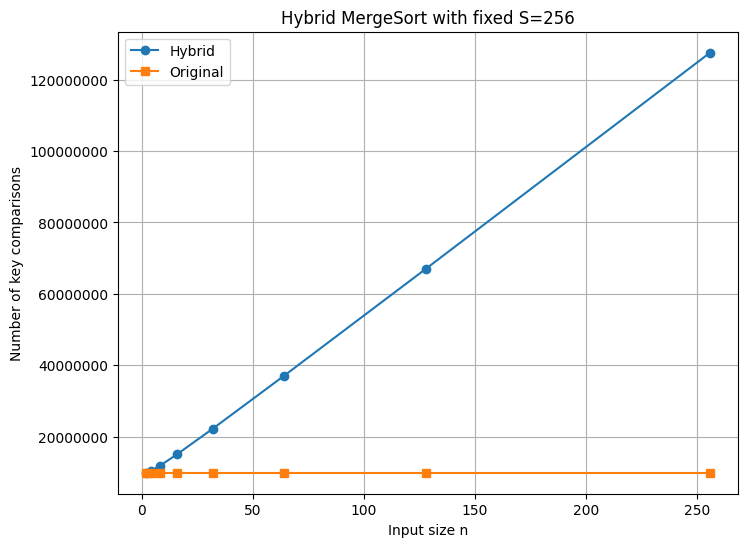

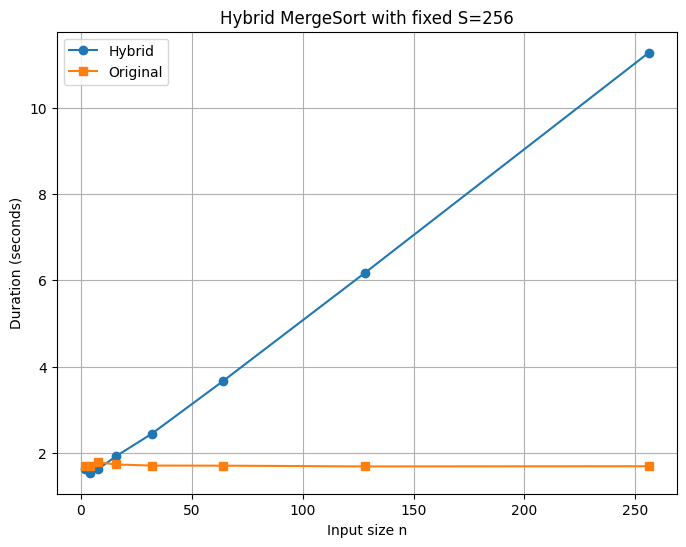

In [7]:
S_values = [2, 4, 8, 16, 32, 64, 128, 256]
n = 1000000
results = []
durations = []
original_results = {"comparisons": [], "duration": []}
arr = [x for x in range(n, 0, -1)]

for S in S_values:
    comparisons = 0
    start_time = time.time()
    hybrid_merge_sort(arr.copy(), 0, n-1, S)
    end_time = time.time()
    results.append(comparisons)
    durations.append(end_time - start_time)

    # Original mergesort
    comparisons = 0
    start_time = time.time()
    mergesort(arr.copy(), 0, n-1)
    end_time = time.time()
    original_results["comparisons"].append(comparisons)
    original_results["duration"].append(end_time - start_time)

# Plot
plt.figure(figsize=(8,6))
plt.plot(S_values, results, marker="o", label="Hybrid")
plt.plot(S_values, original_results["comparisons"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Number of key comparisons")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.plot(S_values, durations, marker="o", label="Hybrid")
plt.plot(S_values, original_results["duration"], marker="s", label="Original")
plt.xlabel("Input size n")
plt.ylabel("Duration (seconds)")
plt.title(f"Hybrid MergeSort with fixed S={S}")
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()